<a href="https://colab.research.google.com/github/SimreAniri/Neural-Networks/blob/master/Lesson_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import load_boston

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
data = boston["data"]
data.shape

(506, 13)

In [10]:
data = pd.DataFrame(data, columns=boston["feature_names"])
target = boston["target"]

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [13]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [14]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler_data = MinMaxScaler()

train_data = scaler_data.fit_transform(data)

In [16]:
train_data

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=0.25)

In [30]:
X_train.shape

(379, 13)

In [51]:
neural = [250, 300, 350]

for i in neural:
  print(i)
  x_input = keras.layers.Input(shape=(1,13))
  x = keras.layers.Dense(i, activation='relu')(x_input)
  x_output = keras.layers.Dense(1)(x)
  model = keras.models.Model(x_input, x_output)

  model.compile(optimizer='adam',
                loss='mse',
                metrics=['mae'])

  hist1 = model.fit(X_train, y_train, epochs=10, batch_size=1)

250
Epoch 1/10
379/379 [==============================] - 0s 1ms/step - loss: 199.6191 - mae: 10.8756
Epoch 2/10
379/379 [==============================] - 0s 1ms/step - loss: 58.7699 - mae: 5.2857
Epoch 3/10
379/379 [==============================] - 0s 1ms/step - loss: 43.5865 - mae: 4.6412
Epoch 4/10
379/379 [==============================] - 0s 1ms/step - loss: 35.8335 - mae: 4.2448
Epoch 5/10
379/379 [==============================] - 0s 1ms/step - loss: 31.1704 - mae: 3.8215
Epoch 6/10
379/379 [==============================] - 0s 1ms/step - loss: 27.2225 - mae: 3.6226
Epoch 7/10
379/379 [==============================] - 0s 1ms/step - loss: 24.9337 - mae: 3.4275
Epoch 8/10
379/379 [==============================] - 0s 1ms/step - loss: 23.5994 - mae: 3.3470
Epoch 9/10
379/379 [==============================] - 0s 1ms/step - loss: 21.9849 - mae: 3.2303
Epoch 10/10
379/379 [==============================] - 0s 1ms/step - loss: 20.6376 - mae: 3.1696
300
Epoch 1/10
379/379 [=========

In [64]:
x_input = keras.layers.Input(shape=(1,13))
x = keras.layers.Dense(300, activation='relu')(x_input)
x_output = keras.layers.Dense(1)(x)
model = keras.models.Model(x_input, x_output)

model.compile(optimizer='adam',
                loss='mse',
                metrics=['mae'])

hist1 = model.fit(X_train, y_train, epochs=13, batch_size=1)

Epoch 1/13
379/379 [==============================] - 0s 1ms/step - loss: 173.4251 - mae: 10.1573
Epoch 2/13
379/379 [==============================] - 0s 1ms/step - loss: 53.3680 - mae: 5.2262
Epoch 3/13
379/379 [==============================] - 0s 1ms/step - loss: 39.3951 - mae: 4.3939
Epoch 4/13
379/379 [==============================] - 0s 1ms/step - loss: 32.7569 - mae: 4.0110
Epoch 5/13
379/379 [==============================] - 0s 1ms/step - loss: 27.3312 - mae: 3.6630
Epoch 6/13
379/379 [==============================] - 0s 1ms/step - loss: 24.5840 - mae: 3.4002
Epoch 7/13
379/379 [==============================] - 0s 1ms/step - loss: 23.2211 - mae: 3.3480
Epoch 8/13
379/379 [==============================] - 0s 1ms/step - loss: 22.1553 - mae: 3.2840
Epoch 9/13
379/379 [==============================] - 0s 1ms/step - loss: 20.7177 - mae: 3.0640
Epoch 10/13
379/379 [==============================] - 0s 1ms/step - loss: 20.4492 - mae: 3.0538
Epoch 11/13
379/379 [================

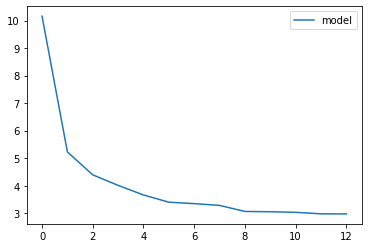

In [65]:
plt.plot(hist1.history['mae'],label ='model')
plt.legend()
plt.show()

In [66]:
y_pred = model.predict(X_test)

In [67]:
d = pd.DataFrame()
d['test'] = y_test
d['pred'] = y_pred
d.head()

,test,pred
0,16.5,12.243778
1,21.9,25.424652
2,21.6,25.514137
3,17.4,17.044201
4,13.8,20.305841


In [68]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7015677581420224